In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size = 14)
plt.rc("axes", labelsize = 14, titlesize = 14)
plt.rc("legend", fontsize = 14)
plt.rc("xtick", labelsize = 10)
plt.rc("ytick", labelsize = 14)

In [2]:
import numpy as np
import sklearn
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame = True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) 

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2,0.5], [3,1]]
y_pred = per_clf.predict(X_new)


In [3]:
y_pred

array([ True, False])

In [4]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss="perceptron", learning_rate="constant",
                        penalty=None, eta0 = 1, random_state=42)

sgd_clf.fit(X, y)
assert(sgd_clf.coef_ == per_clf.coef_).all()
assert(sgd_clf.intercept_ == per_clf.intercept_).all()

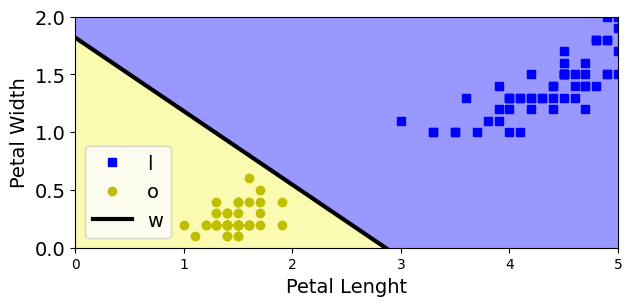

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

axes = [0,5,0,2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1,1),
    np.linspace(axes[2], axes[3], 500).reshape(-1,1)
)

slope = -per_clf.coef_[0,0] / per_clf.coef_[0,1]
intercept = -per_clf.intercept_/ per_clf.coef_[0,1]

X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7,3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label = "Not Iris Setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label = "Iris Setosa")
plt.plot([axes[0], axes[1]], [slope * axes[0] + intercept, slope * axes[1] + intercept], "k-",
         linewidth = 3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal Lenght")
plt.ylabel("Petal Width")
plt.legend("lower left")
plt.axis(axes)

plt.show()



In [6]:
per_clf.coef_, per_clf.intercept_

(array([[-1.4, -2.2]]), array([4.]))

#### Activation Functions


In [7]:
from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0,z)

def derivative(f,z, eps = 0.0000001):
    return (f(z + eps) - f(z - eps)) / (2 * eps)



### Building and Training MLP's

In [11]:
from sklearn.datasets import fetch_openml

fashion_mnist = fetch_openml(name="Fashion-MNIST", as_frame=False)
targets = fashion_mnist.target.astype(int)

In [12]:
X_train, y_train = fashion_mnist.data[:60000], targets[:60000]
X_test, y_test = fashion_mnist.data[60000:], targets[60000:]

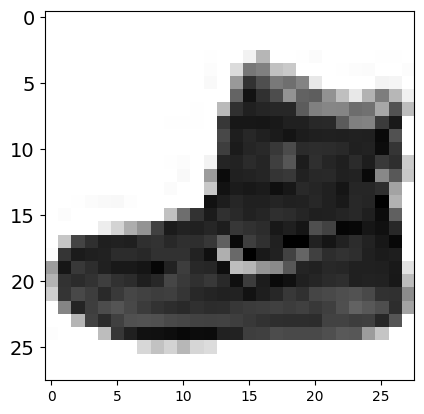

In [13]:
import matplotlib.pyplot as plt

X_sample = X_train[0].reshape(28,28)
plt.imshow(X_sample, cmap="binary")
plt.show()

In [14]:
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [15]:
class_names[y_train[0]]

'Ankle Boot'

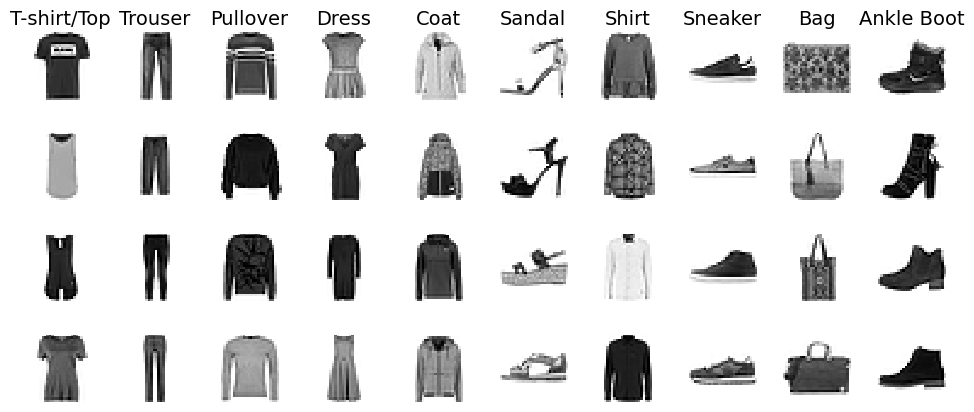

In [17]:
n_rows = 4
plt.figure(figsize=(12, n_rows * 1.2))
for row in range(n_rows):
    for class_index in range(10):
        X_img = X_train[y_train == class_index][row].reshape(28,28)
        y_img = y_train[y_train == class_index][row]
        plt.subplot(4, 10, 10 * row + class_index + 1)
        plt.imshow(X_img, cmap="binary", interpolation="nearest")
        plt.axis("off")
        if row == 0:
            plt.title(class_names[y_img])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

mlp_clf = MLPClassifier(hidden_layer_sizes=[300, 100], verbose=True, 
                        early_stopping=True, random_state=42)
pipeline = make_pipeline(MinMaxScaler(),mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_test, y_test)
accuracy

Iteration 1, loss = 0.55394420
Validation score: 0.854833
Iteration 2, loss = 0.39017365
Validation score: 0.867500
Iteration 3, loss = 0.34572472
Validation score: 0.877500
Iteration 4, loss = 0.31541926
Validation score: 0.881167
Iteration 5, loss = 0.29351007
Validation score: 0.887167
Iteration 6, loss = 0.28459028
Validation score: 0.889167
Iteration 7, loss = 0.26775210
Validation score: 0.885500
Iteration 8, loss = 0.25610516
Validation score: 0.886667
Iteration 9, loss = 0.24488907
Validation score: 0.893167
Iteration 10, loss = 0.23915583
Validation score: 0.888500
Iteration 11, loss = 0.22290961
Validation score: 0.897167
Iteration 12, loss = 0.21925185
Validation score: 0.889667
Iteration 13, loss = 0.21249406
Validation score: 0.892167
Iteration 14, loss = 0.20374069
Validation score: 0.891333
Iteration 15, loss = 0.19557455
Validation score: 0.893833
Iteration 16, loss = 0.19099949
Validation score: 0.893667
Iteration 17, loss = 0.18445775
Validation score: 0.890333
Iterat

0.8929

In [19]:
mlp_clf.best_validation_score_

0.9023333333333333

In [25]:
X_new = X_test[:15]
y_pred = mlp_clf.predict(X_new)

In [26]:
y_pred

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4])

In [35]:
y_test[:15]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4])

In [34]:
np.where((y_test[:15] == y_pred) == False)[0].item()

12

In [37]:
y_prob = mlp_clf.predict_proba(X_new)
y_prob[12]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])